# Exploratory Data Analysis

The first step is to conduct an exploratory data analysis (EDA), to identify trends, patterns, and outliers in the dataset. Note: Only Uber data will be used in this analysis and the upcoming modelling.


First, we import the necessary Python libraries.

In [73]:
#@title Imports for Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Loading the CSV using Pandas and taking a quick look inside the dataset below.

In [74]:

df = pd.read_csv('../data/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [75]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [76]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
cab_types = df['cab_type'].unique()
print(cab_types)

['Lyft' 'Uber']


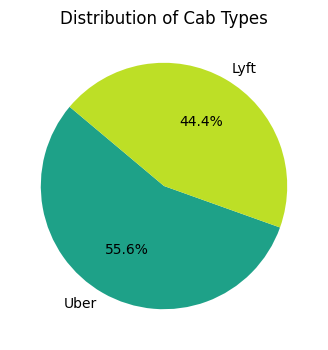

In [77]:
cab_type_counts = df['cab_type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(cab_type_counts, labels=cab_type_counts.index, autopct='%1.1f%%', startangle=140, colors = ['#1ea188', '#bddf26'])
plt.title('Distribution of Cab Types')
plt.show()

Creating a Pandas DataFrame with only Uber records, as we will be only using Uber data in our model development.

In [78]:
df2 = df[df['cab_type'] != 'Lyft'].copy()
new_cab_types = df2['cab_type'].unique()
print(new_cab_types)

['Uber']


Next, we will check for null values, and then replace them with the mean of the other not null values in that column.

In [79]:
print(df2.isnull().sum())
print(df2.isnull().sum().sum())

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [80]:
percentage_missing = df['price'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in the Uber price column: {percentage_missing}%")

Percentage of missing values in the Uber price column: 7.949402009317949%


Although only a small percentage of values in the price column are missing, the corresponding records will be dropped instead of imputed - imputing a large number of missing values with a single value can lead to reduced accuracy and overfitting (since it may not reflect the real-world distribution of prices).

In [81]:
df2 = df[df['price'].notna()]
print(df2.isnull().sum())
print(df2.isnull().sum().sum())

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Now, we will visualize our data. First, is the number of rides per month. The data only contains data from November to December 2018, as apparent.

Text(0.5, 1.0, 'Ride Count per Month')

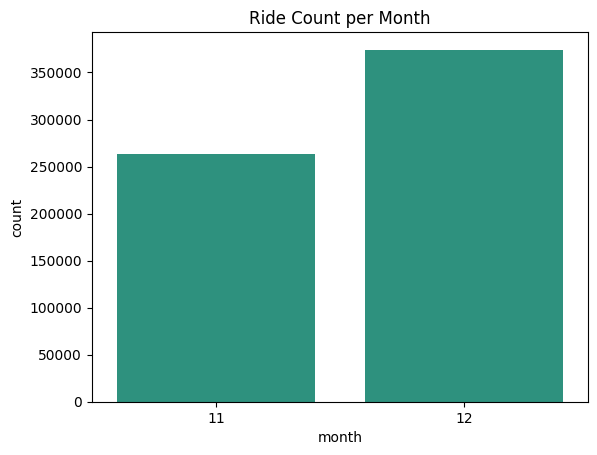

In [82]:
sns.countplot(x='month', data=df2, color='#1ea188')
df2['month'].value_counts()
plt.title('Ride Count per Month')

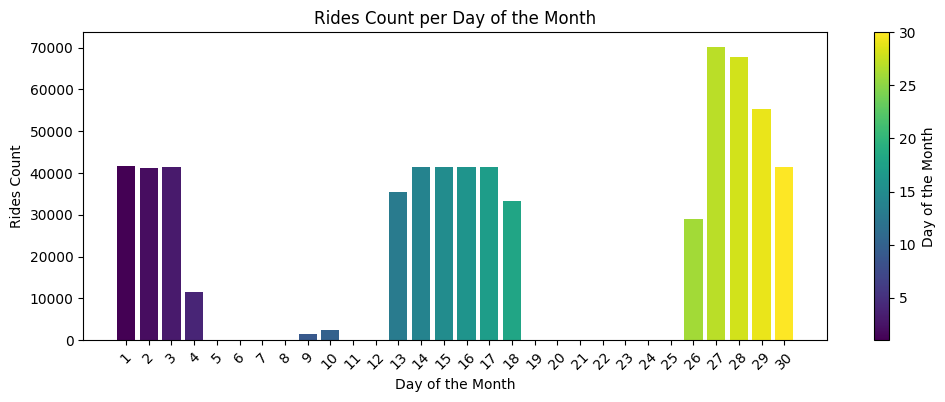

In [83]:
rides_per_day = df2['day'].value_counts().sort_index()
rides_per_day = rides_per_day.reindex(range(1, 31), fill_value=0)  
norm = plt.Normalize(1, 30)  
colors = plt.cm.viridis(norm(rides_per_day.index))
fig, ax = plt.subplots(figsize=(12, 4))

ax.bar(rides_per_day.index, rides_per_day.values, color=colors)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Day of the Month')

ax.set_xlabel('Day of the Month')
ax.set_ylabel('Rides Count')
ax.set_title('Rides Count per Day of the Month')  # Corrected title
ax.set_xticks(range(1, 31))
ax.set_xticklabels(range(1, 31), rotation=45)

plt.show()

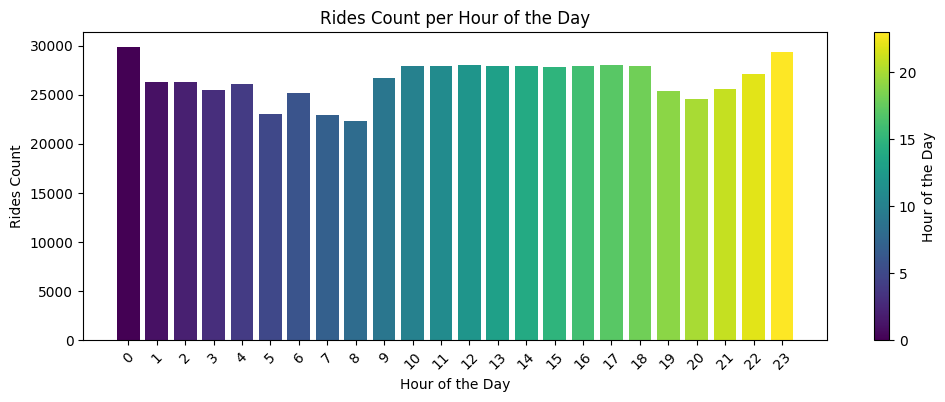

In [84]:
rides_per_hour = df2['hour'].value_counts().sort_index()
rides_per_hour = rides_per_hour.reindex(range(0, 24), fill_value=0)  
norm = plt.Normalize(0, 23)  
colors = plt.cm.viridis(norm(rides_per_hour.index))
fig, ax = plt.subplots(figsize=(12, 4))

ax.bar(rides_per_hour.index, rides_per_hour.values, color=colors)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Hour of the Day')

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Rides Count')
ax.set_title('Rides Count per Hour of the Day')  # Corrected title
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24), rotation=45)

plt.show()


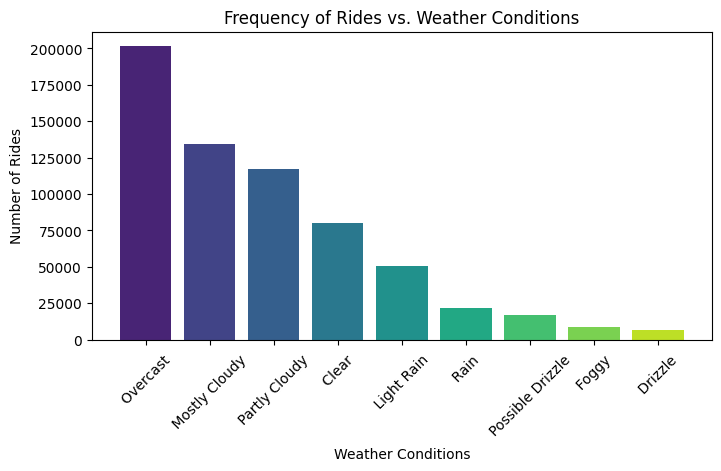

In [85]:
ride_counts_by_weather = df2['short_summary'].value_counts()
ride_counts_by_weather = ride_counts_by_weather.sort_values(ascending=False)
n_colors = ride_counts_by_weather.size  # Number of unique weather conditions
palette = sns.color_palette("viridis", n_colors)

plt.figure(figsize=(8, 4))
bars = plt.bar(ride_counts_by_weather.index, ride_counts_by_weather.values, color=palette)

plt.title('Frequency of Rides vs. Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()

Now, we'll take a look at the distribution of price, and also how the distance of the trip affects it.

In [86]:
df2_describe = pd.DataFrame(df2['price'])
df2_describe.describe()

,price
count,637976.000000
mean,16.545125
std,9.324359
min,2.500000
25%,9.000000
50%,13.500000
75%,22.500000
max,97.500000


In [87]:
df2_describe = pd.DataFrame(df2['distance'])
df2_describe.describe()

,distance
count,637976.000000
mean,2.189261
std,1.135413
min,0.020000
25%,1.270000
50%,2.160000
75%,2.930000
max,7.860000


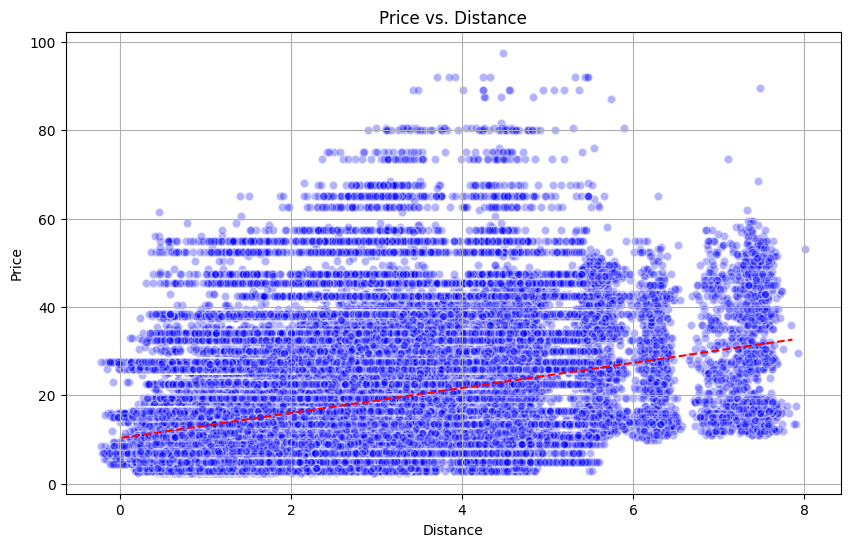

In [88]:
z = np.polyfit(df2['distance'], df2['price'], 1)
p = np.poly1d(z)

# Jitter the 'distance' values slightly to reduce overplotting
distance_jittered = df2['distance'] + np.random.normal(0, 0.1, size=len(df2))

plt.figure(figsize=(10, 6))
plt.scatter(distance_jittered, df2['price'], alpha=0.3, edgecolor='w', color='blue')

plt.plot(np.sort(df2['distance']), p(np.sort(df2['distance'])), "r--")

plt.title('Price vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Unfortunately, it's difficult to discern patterns in the above scatter plot, because the data is from is a large dataset which results in overplotting

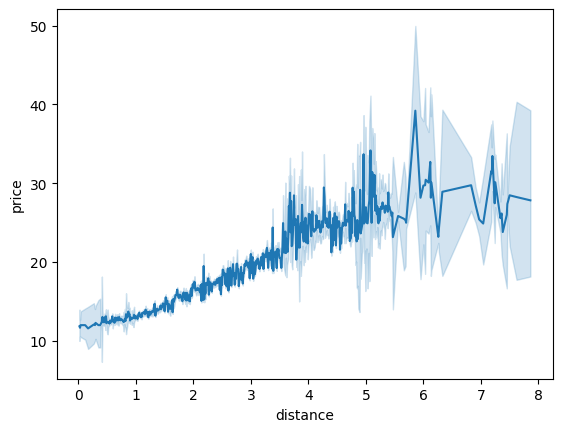

In [89]:
sns.lineplot( x=df2['distance'] , y=df2['price'])
plt.show()

Now, upon completing our exploratory data analysis, we can make more informed decisions when cleaning our data and building models.

# Data Preprocessing

The next step is data preprocessing. This is a critical step where our data is transformed to a more suitable format for analysis and modeling. It helps to improve the accuracy of the model by cleaning the data and handling missing values. This sets the stage for developing robust, efficient, and accurate predictive models.

In [1]:
#@title Imports for Project
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
#Identify number of null values per column in the database
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [4]:
#Drop rows that have a null value in the price column
df = df[df['price'].notna()]
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [5]:
#Remove duplicates in the ID column
df = df.drop_duplicates('id')

In [6]:
# Check for duplicate rows
duplicates = df.duplicated()
duplicates_num = duplicates.sum()

print(duplicates_num)

0


In [7]:
# Reduce data to only contain longitude between -180 and 180, and latitude between -90 and 90
df = df[(df['longitude'] > -180) & (df['longitude'] < 180)]
df = df[(df['latitude'] > -90) & (df['latitude'] < 90)]

In [8]:
# Drop unnecessary Lyft data
df = df[df['cab_type'] != 'Lyft']

df['cab_type']

12        Uber
13        Uber
14        Uber
15        Uber
16        Uber
          ... 
693065    Uber
693066    Uber
693067    Uber
693069    Uber
693070    Uber
Name: cab_type, Length: 330568, dtype: object

In [9]:
# Remove duplicate column

(df['visibility'] == df['visibility.1']).all()
df.drop('visibility.1', axis=1, inplace=True)

In [12]:
# Removing outliers in the numerical columns

columns_to_check = ['price', 'distance', 'surge_multiplier', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']

outliers = {}
for column in columns_to_check:
    mean = df[column].mean()
    std = df[column].std()
    outliers_mask = (df[column] < mean - 3 * std) | (df[column] > mean + 3 * std)
    outliers[column] = df[column][outliers_mask]

for column, outliers_data in outliers.items():
    if not outliers_data.empty:
        print(f"Outliers in column '{column}':")
        print(outliers_data)
        print("\n")

Outliers in column 'price':
2104      42.0
2143      46.5
2219      50.5
2567      41.5
2686      56.0
          ... 
692103    49.5
692205    42.0
692439    47.0
692962    51.0
693007    49.5
Name: price, Length: 2380, dtype: float64


Outliers in column 'distance':
516       7.46
2214      7.34
2215      7.34
2216      7.34
2218      7.34
          ... 
693005    7.36
693006    7.36
693007    7.36
693008    7.36
693009    7.36
Name: distance, Length: 3192, dtype: float64


Outliers in column 'temperature':
61        18.97
116       19.28
566       18.97
686       18.97
817       18.97
          ...  
690952    19.28
692920    18.97
692921    18.97
692922    18.97
692923    18.97
Name: temperature, Length: 2576, dtype: float64


Outliers in column 'precipIntensity':
42        0.1299
68        0.1299
204       0.0920
238       0.1267
241       0.1088
           ...  
692738    0.1264
692739    0.1264
692804    0.1289
692805    0.1289
692806    0.1289
Name: precipIntensity, Length: 1314

In [14]:
# Separate the Datetime column into time, year, month, date and day of the week

df['datetime'] = pd.to_datetime(df['datetime'])

df['time'] = df['datetime'].dt.strftime('%H:%M')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.strftime('%B')
df['day'] = df['datetime'].dt.day
df['day_of_week'] = df['datetime'].dt.dayofweek 

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_of_week'] = df['day_of_week'].map(day_names)

# Reorder columns to ensure time/ date columns are together
df = df[['id', 'timestamp', 'day_of_week', 'month', 'day', 'year', 'time', 'datetime', 'hour',  'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']]
df.head()

,id,timestamp,day_of_week,month,day,year,time,datetime,hour,timezone,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
12,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,Friday,November,30,2018,22:13,2018-11-30 22:13:01,22,America/New_York,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
13,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,Thursday,December,13,2018,10:50,2018-12-13 10:50:11,10,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,Thursday,December,13,2018,19:15,2018-12-13 19:15:03,19,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
15,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,Sunday,December,16,2018,23:55,2018-12-16 23:55:11,23,America/New_York,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
16,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,Friday,December,14,2018,00:40,2018-12-14 00:40:07,0,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [ ]:
# Save cleaned dataframe
df.to_csv('cleaned_data.csv', index=False)


## Feature Engineering

Feature engineering is a crucial step that involves selecting, changing, or creating new features from raw data to help our model perform better. By doing this, the data is presented in a way that helps the algorithm find patterns more easily, leading to better accuracy, efficiency, and understanding of the model. Feature engineering helps align the data with specific insights unique to the field, allowing the algorithm to take advantage of its strengths and minimize its weaknesses. This step is essential in improving the predictive capability of our model.

In [57]:
#@title Imports for Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [674]:
# Machine learning libraries and modules
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Data visualization library
import matplotlib.pyplot as plt

In [675]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,id,timestamp,day_of_week,month,day,year,time,datetime,hour,timezone,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,Friday,November,30,2018,22:13,2018-11-30 22:13:01,22,America/New_York,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,Thursday,December,13,2018,10:50,2018-12-13 10:50:11,10,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,Thursday,December,13,2018,19:15,2018-12-13 19:15:03,19,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,Sunday,December,16,2018,23:55,2018-12-16 23:55:11,23,America/New_York,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,Friday,December,14,2018,00:40,2018-12-14 00:40:07,0,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [676]:
df.shape

(330568, 59)

Upon initial examination, several columns in the dataset exhibit little variability and may not contribute significantly to the analysis. These columns include:

- **year**: All the data in the dataset was collected in 2018. Since there is no variation in the year column, it does not provide any useful information for analysis.

- **month**: The data spans the months of November and December. As a result, the month column will not show significant correlations in this analysis due to the limited range of values.

- **timezone**: The timezone for all records is consistent and set to America/New_York, indicating that the data was collected in Boston. Since there is no variation in timezone, it does not add value to the analysis.

- **cab_type**: The dataset exclusively contains Uber data. Since there is only one cab type present (Uber), the cab type column does not provide any differentiation among records and hence does not contribute to the analysis.

- **surge_multiplier**: For Uber rides, the surge multiplier remains constant at 1. This feature is pertinent to different cab types but remains unvarying for Uber in this dataset. Therefore, it does not provide any discriminatory power for analysis.

- **short-summary**: Both short-summary and long summary are extra text. Icon can describe the same feature in less text. These columns can be revisited if icon has a large impact.

- **long-summary**: Same reasoning as short-summary.

Additionally,

- **product_id**: This column contains cryptic codes that cannot be deciphered without additional context. Given the lack of meaningful interpretation and variability, the product_id column will not be considered for analysis.

By excluding these columns from the analysis, we can focus on features that exhibit variability and are more likely to contribute meaningfully to the predictive models or analytical insights derived from the dataset.

In [677]:
# identify columns with constant values
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
constant_columns

['year', 'timezone', 'cab_type', 'surge_multiplier']

In [678]:
# drop columns with constant values
df = df.loc[:, df.nunique(dropna=False) > 1]
df.shape

(330568, 55)

In [679]:
# drop more unnecessary features 
features_drop = ['product_id', 'month', 'short_summary', 'long_summary', 'latitude', 'longitude']
df = df.drop(features_drop, axis=1)

In [680]:
df.shape

(330568, 49)

### Plotting Feature with Price

We created a correlation matrix of all features to help provide a clear overview of how features relate to each other and to the target variable, helping to identify potential predictors for the model. It aids in spotting multicollinearity, where two or more features are highly correlated and could destabilize model estimates. It can also reveal unexpected relationships between variables, offering insights that could drive more informed feature selection and engineering decisions.

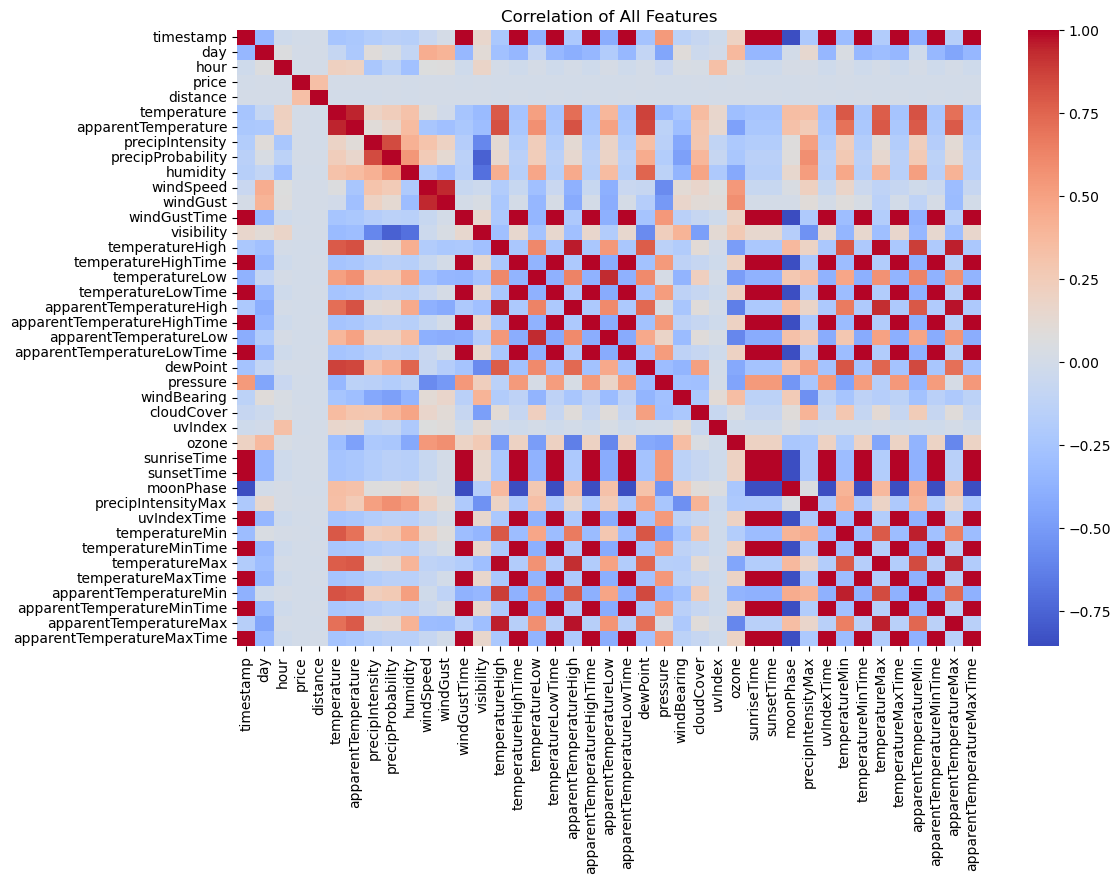

In [681]:
# initially lets start off by determining the correlation of all features
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm')
plt.title("Correlation of All Features")
plt.show()

Although, since our focus is more features affect on price we created correlation matrix of price with numerical features. This is to shows how each feature potentially impacts the target variable. This allows for targeted feature selection, which efficiently narrows down the list of features to those with significant correlations, either positive or negative, with price. 

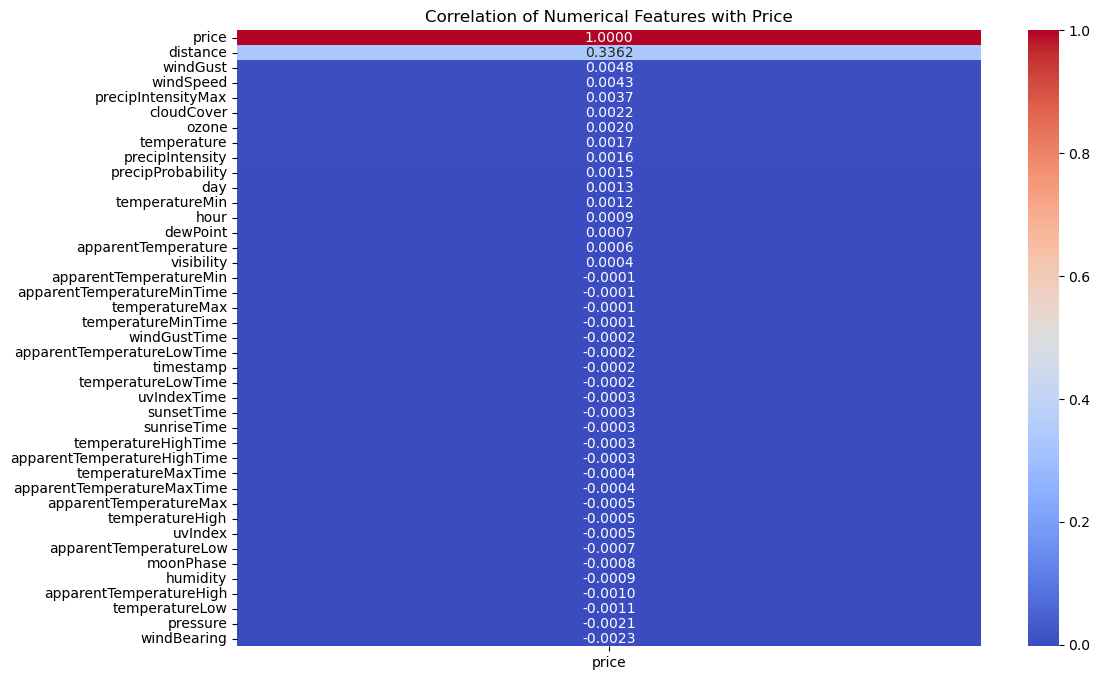

In [682]:
# then lets determine the correlation of price with numerical features
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
corr_with_price = corr_matrix[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_with_price, annot=True, fmt=".4f", cmap='coolwarm', cbar=True)
plt.title("Correlation of Numerical Features with Price")
plt.show()

Referencing the graph, we identified that distance has the most significant impact on price. While other features do have an effect, they are not as influential as distance.

We also examined the relationship between price and categorical features, particularly those related to name, icon, source, and destination.

<Axes: xlabel='price', ylabel='name'>

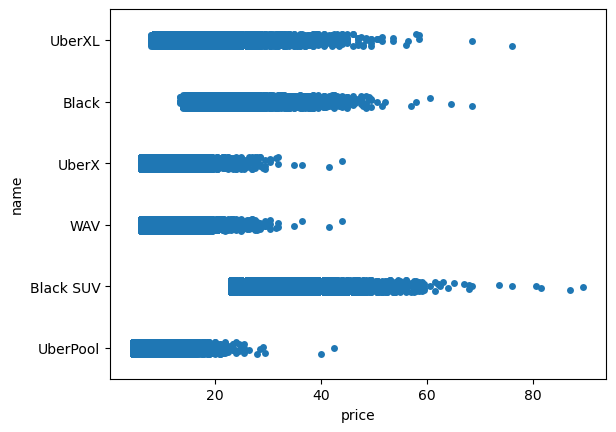

In [683]:
sns.stripplot(data=df, x='price', y='name')

<Axes: xlabel='price', ylabel='icon'>

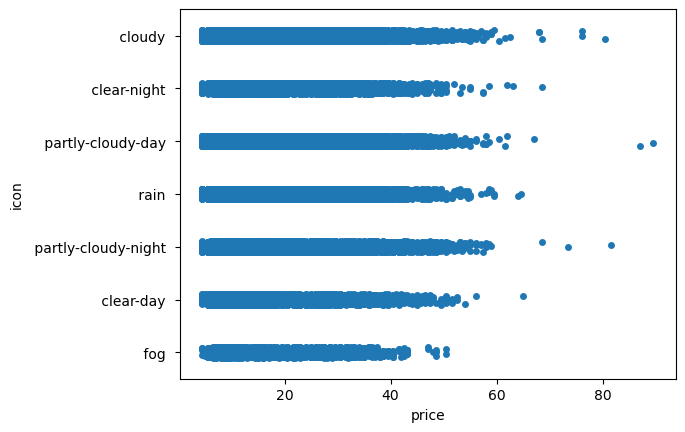

In [684]:
sns.stripplot(data=df, x='price', y='icon')

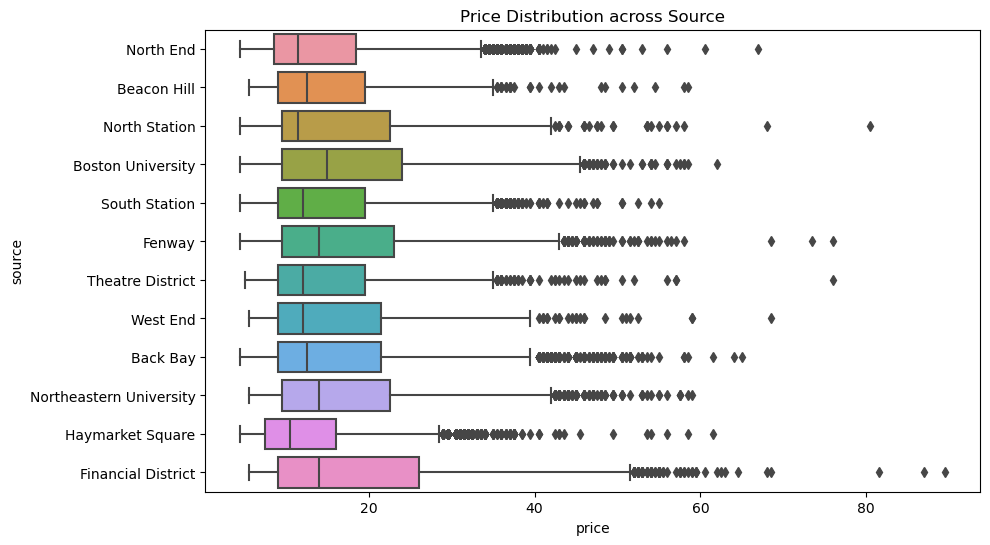

In [685]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price', y='source')
plt.title("Price Distribution across Source")
plt.show()

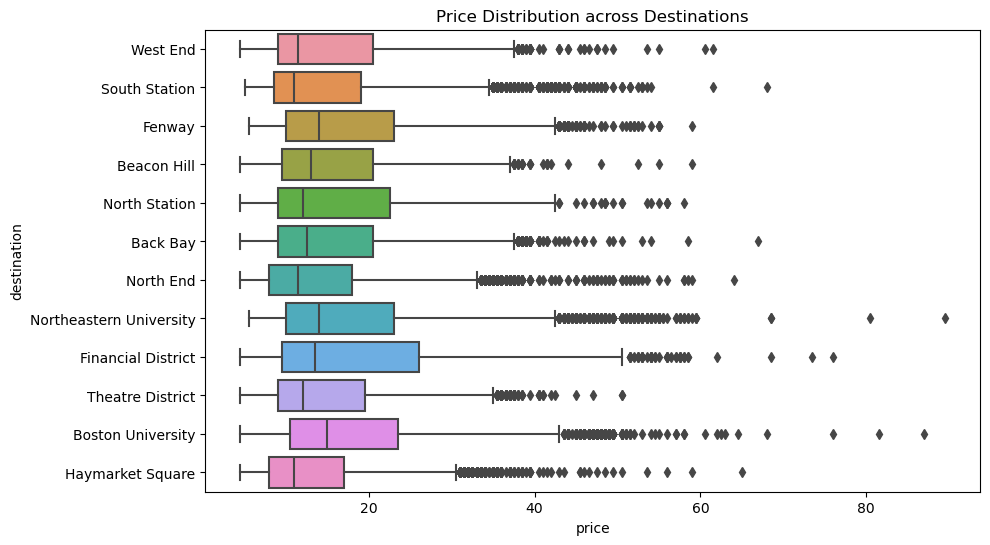

In [686]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price', y='destination')
plt.title("Price Distribution across Destinations")
plt.show()

### Label Encoding

We are using Label Encoder to help the model understand different factors that affect the price. This method helps us turn text data into numbers that the model can understand, which is important for using categorical predictors in regression analysis. Even though these categories don't have any inherent order, transforming them into numbers helps the algorithm to understand how they influence the target variable, which in this case is the price. This enriches the dataset with important information that wasn't previously numeric. By using this approach, we can include a variety of categorical factors, like source or destination, in our predictive model. This improves the model's ability to capture complex patterns and relationships in the data, which is essential for accurate price prediction.

In [687]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df.dtypes

id                              object
timestamp                      float64
day_of_week                     object
day                              int64
time                            object
datetime                        object
hour                             int64
source                          object
destination                     object
name                            object
price                          float64
distance                       float64
temperature                    float64
apparentTemperature            float64
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                       float64
windGustTime                     int64
visibility                     float64
temperatureHigh                float64
temperatureHighTime              int64
temperatureLow                 float64
temperatureLowTime               int64
apparentTemperatureHigh  

In [688]:
columns = ['day_of_week', 'time', 'datetime', 'source','destination','name', 'icon']

columns_to_print = {'name', 'icon'}

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])
    
    if column in columns_to_print:
        print(f"Class mapping of {column}: ")
        for i, item in enumerate(label_encoder.classes_):
            print(f"{item} --> {i}")

Class mapping of name: 
Black --> 0
Black SUV --> 1
UberPool --> 2
UberX --> 3
UberXL --> 4
WAV --> 5
Class mapping of icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [689]:
# shows that object datatypes have been converted
df.head()

,id,timestamp,day_of_week,day,time,datetime,hour,source,destination,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,0,30,1189,8565,22,6,11,4,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,4,13,562,17198,10,6,11,0,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,4,13,1034,18045,19,6,11,3,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,3,16,1279,25775,23,6,11,5,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,35,18593,0,6,11,1,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [690]:
# check for any null values
df.isnull().sum()

id                             0
timestamp                      0
day_of_week                    0
day                            0
time                           0
datetime                       0
hour                           0
source                         0
destination                    0
name                           0
price                          0
distance                       0
temperature                    0
apparentTemperature            0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureLowTime     0
icon                           0
dewPoint  

### Recursive Feature Elimination (RFE)

In order to improve the accuracy and efficiency of our Uber pricing model, we use a technique called Recursive Feature Elimination (RFE) after label encoding. RFE is a systematic approach that refines the set of features used in the model by evaluating their contribution to the model's performance. This means that only the variables with the most significant impact on predicting prices are retained, making the model simpler and less computationally demanding. 

By focusing on the most relevant features, RFE also makes the model more interpretable. This method provides insights into the dataset by evaluating feature importance against model accuracy, which guides us towards a more informed, data-driven understanding of the key determinants of Uber pricing. This targeted feature selection is crucial for developing a predictive model that is both accurate and practical, making RFE an invaluable tool in our modeling process.

In [691]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE

In [692]:
#Assign predictors as X (Note id is removed from this as it is a unique identifier of the data)
X = df.drop(columns=['price', 'id'])
#Assign the target (y) to price as that is what we are trying to predict
y = df['price']

We began with all available features to evaluate the model's performance by examining testing errors (R^2, MSE, MAE) and based on these outcomes, strategically decided to either add or remove features. This approach allowed us to fine-tune the feature set for optimal balance, aiming for improved predictive accuracy and model efficiency by directly linking feature selection to quantifiable measures of error.

#### Accuracy of all features (49)

In [693]:
# Split the data into 20% test and 80% train a common split that will give an averaged result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [694]:
#Display the size of test/training data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(264454, 47) (66114, 47) (264454,) (66114,)


In [695]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print("R^2 score:", metrics.r2_score(y_test, predictions))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions))

R^2 score: 0.4142772089124509
Mean Squared Error (MSE): 42.75833868517134
Mean Absolute Error (MAE): 5.349299585870297


#### Accuracy of 30 features

In [696]:
rfe = RFE(estimator=reg, n_features_to_select=30, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.


Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.


In [697]:
XX = X[X.columns[rfe.support_]]

In [698]:
XX.columns

Index(['day_of_week', 'day', 'hour', 'source', 'destination', 'name',
       'distance', 'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'cloudCover',
       'uvIndex', 'moonPhase', 'precipIntensityMax', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

In [699]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20, random_state = 0)

In [700]:
reg1 = LinearRegression()
reg1 = reg1.fit(X_train, y_train)

predictions1 = reg1.predict(X_test)

print("R^2 score:", metrics.r2_score(y_test, predictions1))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions1))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions1))

R^2 score: 0.4143610705774151
Mean Squared Error (MSE): 42.75221670131173
Mean Absolute Error (MAE): 5.348769802334526


### Accuracy of 20 features

In [701]:
rfe = RFE(estimator=reg, n_features_to_select=20, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.


Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.


In [702]:
XX = X[X.columns[rfe.support_]]

In [703]:
XX.columns

Index(['source', 'name', 'distance', 'temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windGust',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'icon',
       'dewPoint', 'cloudCover', 'uvIndex', 'moonPhase', 'precipIntensityMax',
       'temperatureMax', 'apparentTemperatureMax'],
      dtype='object')

In [704]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20, random_state = 0)

In [705]:
reg2 = LinearRegression()
reg2 = reg2.fit(X_train, y_train)

In [706]:
predictions2 = reg2.predict(X_test)

print("R^2 score:", metrics.r2_score(y_test, predictions2))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions2))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions2))

R^2 score: 0.41442192803101663
Mean Squared Error (MSE): 42.74777404746215
Mean Absolute Error (MAE): 5.3484107201855355


### Accuracy of 10 features

In [707]:
rfe = RFE(estimator=reg, n_features_to_select=10, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.


Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

In [708]:
XX = X[X.columns[rfe.support_]]

In [709]:
XX.columns

Index(['name', 'distance', 'precipIntensity', 'precipProbability',
       'temperatureHigh', 'apparentTemperatureHigh', 'moonPhase',
       'precipIntensityMax', 'temperatureMax', 'apparentTemperatureMax'],
      dtype='object')

In [710]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20, random_state = 0)

In [711]:
reg3 = LinearRegression()
reg3 = reg3.fit(X_train, y_train)

In [712]:
predictions3 = reg3.predict(X_test)

print("R^2 score:", metrics.r2_score(y_test, predictions3))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions3))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions3))

R^2 score: 0.4144684433126976
Mean Squared Error (MSE): 42.74437838624081
Mean Absolute Error (MAE): 5.347693388463468


We analyzed the accuracy of our Uber pricing model with varying numbers of features, specifically from 30 down to 10. What we observed was that as we reduced the number of features, there was a consistent improvement in performance metrics such as R^2, MSE, and MAE. This suggested that the model became more efficient and accurate with fewer, more impactful features. 

Further analysis showed that a set of features consistently contributed to the model's performance across different configurations (name, distance), indicating their significant predictive power for Uber pricing. Therefore, we decided to test the model's accuracy with just two features. This was driven by our desire to understand how much we could simplify the model without sacrificing accuracy.

### Accuracy of 2 features

In [713]:
rfe = RFE(estimator=reg, n_features_to_select=2, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.


Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

In [714]:
XX = X[X.columns[rfe.support_]]

In [715]:
XX.columns

Index(['name', 'distance'], dtype='object')

In [716]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20, random_state = 0)

In [717]:
reg4 = LinearRegression()
reg4 = reg4.fit(X_train, y_train)

In [718]:
predictions4 = reg4.predict(X_test)

print("R^2 score:", metrics.r2_score(y_test, predictions4))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions4))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions4))

R^2 score: 0.41451236282866444
Mean Squared Error (MSE): 42.74117221846456
Mean Absolute Error (MAE): 5.347386089812287


After analyzing the results of R^2, MSE, and MAE, we found that our model was most accurate when using just two features with name" and distance. However, we don't believe that a model with just two features would be effective for predicting Uber pricing, as there are likely many other factors that could have a significant impact on pricing. 

### Recursive Feature Elimination with Cross Validation (RFECV)

To further explore which features are optimal and have the most significant impact on predicting Uber pricing, we decided to use Recursive Feature Elimination with Cross Validation (RFECV). This approach involves systematically dropping features, including name and distance, and evaluating which of the remaining features have the most impact on pricing. 

RFECV combines the efficiency of recursive feature elimination with the robustness of cross-validation. This allows us to identify the features that significantly affect pricing beyond the initial two that we identified earlier. By using this method, we can ensure that the feature set we end up with is not only optimal in terms of model performance but also validated across multiple subsets of data. This provides a well-rounded view of feature importance and model stability.

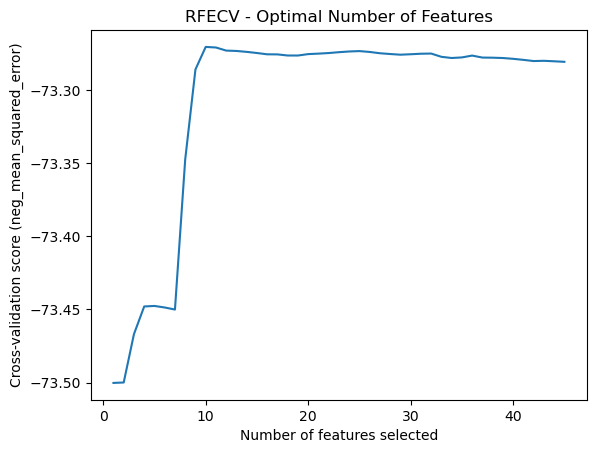

Optimal number of features: 10
Features selected by RFECV: Index(['source', 'destination', 'precipIntensity', 'humidity',
       'temperatureHigh', 'apparentTemperatureHigh', 'uvIndex',
       'precipIntensityMax', 'temperatureMax', 'apparentTemperatureMax'],
      dtype='object')
MSE with RFECV selected features: 72.25468540208657


In [723]:
X = df.drop(columns=['price', 'id', 'name', 'distance'])
y = df['price']

# Splitting dataset into training and testing parts for demonstration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Initialize RFECV
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit RFECV
rfecv.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title('RFECV - Optimal Number of Features')
plt.show()

# Optimal number of features
print("Optimal number of features:", rfecv.n_features_)

# Features selected by RFECV
features_selected_rfecv = X_train.columns[rfecv.support_]
print("Features selected by RFECV:", features_selected_rfecv)

# Evaluating performance with the selected features
model.fit(X_train[features_selected_rfecv], y_train)
y_pred = model.predict(X_test[features_selected_rfecv])
mse = mean_squared_error(y_test, y_pred)
print("MSE with RFECV selected features:", mse)


After applying RFECV, it identified 10 additional features that are optimal for predicting Uber pricing. This selection makes sense considering the many factors that can influence ride-hailing prices beyond just the name and distance, which are typically the most obvious. For example, weather conditions (represented by features like humidity, temperature, and precipitation) can significantly affect demand and, consequently, pricing due to their impact on travel conditions. Similarly, the source and destination locations provide critical geographical context that influences pricing through factors like distance, typical traffic patterns, and area-specific demand. 

The inclusion of apparent temperature alongside actual temperature accounts for human perception of weather, further refining the model's ability to predict customer behavior and pricing dynamics. The RFECV process ensures that the selected features are robust by validating them through cross-validation to contribute positively to the model's predictive accuracy. 

The resulting Mean Squared Error (MSE) of 72.2547 with these features indicates the model's performance with this refined feature set, offering a comprehensive view of the factors that drive Uber pricing. This approach underscores the complexity of pricing models and the necessity of including a diverse set of features to accurately capture this complexity.

### Drop Features

In [724]:
columns_to_keep = ['price', 'name', 'distance', 'source', 'destination', 'precipIntensity', 'humidity',
                   'temperatureHigh', 'apparentTemperatureHigh', 'uvIndex',
                   'precipIntensityMax', 'temperatureMax', 'apparentTemperatureMax']
df = df[columns_to_keep]

In [725]:
df.shape

(330568, 13)

### Final Model

In [726]:
df.head()

,price,name,distance,source,destination,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,uvIndex,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,12.0,4,1.11,6,11,0.0000,0.60,42.52,40.53,0,0.0003,42.52,40.53
1,16.0,0,1.11,6,11,0.0000,0.66,33.83,32.85,0,0.0001,33.83,32.85
2,7.5,3,1.11,6,11,0.0000,0.56,33.83,32.85,0,0.0001,33.83,32.85
3,7.5,5,1.11,6,11,0.0567,0.86,43.83,38.38,0,0.1252,43.83,38.38
4,26.0,1,1.11,6,11,0.0000,0.64,33.83,32.85,0,0.0001,33.83,32.85


In [727]:
df.to_csv('./data_feature_engineering.csv', index=False)

# Test/Training Split


When building machine learning models, it's crucial to split the available data into two sets: training and testing.

#### Training Set:
- **Purpose**: Used to train the model, allowing it to learn patterns and relationships from the data.
- **Size**: Typically larger than the test set.
- **Evaluation**: Model performance is not assessed on this data.

#### Test Set:
- **Purpose**: Reserved for evaluating the model's performance.
- **Size**: Smaller than the training set but representative of the overall data.
- **Evaluation**: Model performance is assessed here to understand its generalization ability.

##### Choice of Split Ratio
- The 20/80 split (20% test, 80% train) is a common choice.
- It strikes a balance between providing enough data for training and ensuring a robust evaluation.
- Factors such as data size, model complexity, and statistical significance influence the split ratio choice.

In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [7]:
df = pd.read_csv('../data/data_feature_engineering.csv')
df.head()

,price,name,distance,source,destination,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,uvIndex,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,12.0,4,1.11,6,11,0.0000,0.60,42.52,40.53,0,0.0003,42.52,40.53
1,16.0,0,1.11,6,11,0.0000,0.66,33.83,32.85,0,0.0001,33.83,32.85
2,7.5,3,1.11,6,11,0.0000,0.56,33.83,32.85,0,0.0001,33.83,32.85
3,7.5,5,1.11,6,11,0.0567,0.86,43.83,38.38,0,0.1252,43.83,38.38
4,26.0,1,1.11,6,11,0.0000,0.64,33.83,32.85,0,0.0001,33.83,32.85


In [8]:
X = df.drop(columns=['price'])
y = df['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(264454, 12) (66114, 12) (264454,) (66114,)


# Modeling Process

Now that the data has been cleaned and the key features have been selected, it's time to model the data with the goal of predicting the correct price. For this analysis, we have chosen to employ five different models:

1. **Linear Regression (Base):** A simple and interpretable model that establishes a linear relationship between the predictor variables and the target variable.

2. **Decision Tree (Base):** An ensemble learning technique that constructs multiple decision trees during training and outputs the mean prediction of the individual trees.

3. **Gradient Boosting:** Another ensemble method that builds models sequentially, with each new model correcting errors made by the previous ones.

4. **K-Nearest Neighbor (KNN):** A non-parametric method that predicts the value of a target variable by averaging the values of its k nearest neighbors.

5. **Neural Network:** A deep learning model composed of multiple layers of interconnected nodes, capable of learning complex patterns in the data.

We aim to evaluate the models performances and select the one that best predicts the price. Evaluation will be based on several performance metrics:

- **Mean Squared Error (MSE):** This metric measures the average squared difference between the actual and predicted values. It provides an overall idea of how well the model is performing.

- **Root Mean Squared Error (RMSE):** Similar to MSE but in the same units as the target variable. RMSE gives a more intuitive understanding of the model's performance.

- **R-squared (R^2) value:** This metric indicates the proportion of the variance in the target variable that is predictable from the independent variables. A higher R-squared value suggests a better fit of the model to the data.

By considering these metrics, we can assess the performance of each model and choose the one that has the best balance between accuracy and interpretability. Additionally, computational efficiency will also be considered to ensure that the chosen model is practical for this objective.


### 1. Linear Regression
The statistical method linear regression is used to model the relationship between dependent and independent variables by fitting a linear equation to the observed data. We will be using linear regression to understand and predict the behavior of our Price, X, variable, based on our explanatory, y, variables. 

In [10]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

# Fit a linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

#Based off the model predict the y values given the test data
predictions = model.predict(X_test)

#Evaluation Metrics
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# R-squared (R2)
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 42.62018108476955
R-squared: 0.4112083327373267
Root Mean Squared Error: 6.528413366566914


The model has yielded an MSE of 42.620, the R2 value of 0.411, and a RMSE of about 8.04. The metrics show us that the average squared difference between the actual and predicted values of the price, is approximately 42.62, the model only explains around 41.1% of the variability and the average predicted error is 6.528. While the model demonstrates adequate predictive capability, the relatively high MSE and RMSE values and the low R-squared suggest limited explanatory power. Therefore, this linear regression model may not be the most suitable choice for accurately predicting prices in this context but can be used as a good base.

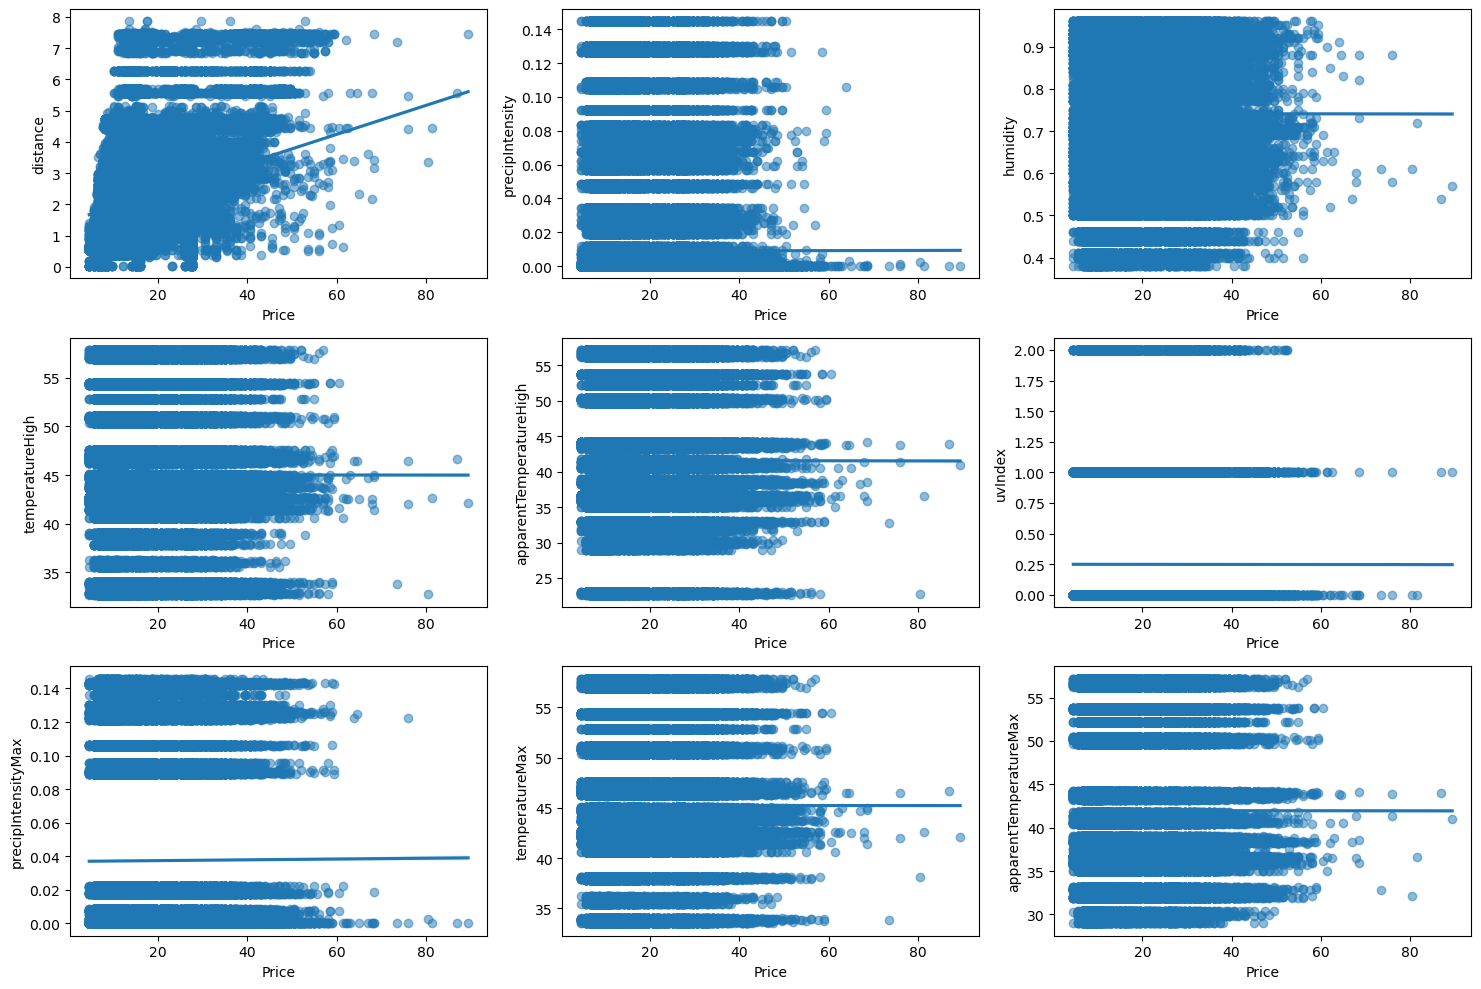

In [11]:

# Plotting regression line for each exploratory variable
exploratory_vars = ['distance', 'precipIntensity', 'humidity', 'temperatureHigh', 
                    'apparentTemperatureHigh', 'uvIndex', 'precipIntensityMax', 
                    'temperatureMax', 'apparentTemperatureMax']

plt.figure(figsize=(15, 10))

for i, var in enumerate(exploratory_vars):
    plt.subplot(3, 3, i+1)
    sns.regplot(y=df[var], x=df['price'], scatter_kws={'alpha':0.5})
    plt.xlabel('Price')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

**Distance vs. Price**: Shows a positive correlation; as distance increases, price tends to increase.

**Precipitation Intensity vs. Price**: No clear relationship; the price does not change significantly with varying precipitation intensities.

**Humidity vs. Price**: No clear relationship; humidity levels do not show a distinct effect on price.

**Temperature vs. Price**: Weak positive correlation; higher temperatures might slightly increase prices.

**Apparent Temperature vs. Price**: Weak positive correlation; similar to temperature, higher apparent temperatures might slightly increase prices.

**UV Index vs. Price**: No clear relationship; UV index does not appear to influence Uber prices.

Overall, distance seems to be the most significant factor affecting Uber prices in these graphs, while weather-related factors have little to no clear impact.


##  Decision Trees Regression

#### Decision Trees
A Decision Tree is a tree-like structure. It learns from data by recursively splitting it into subsets based on features, aiming to maximize homogeneity within each subset. Decision Trees are easy to interpret but prone to overfitting.

In [6]:
from sklearn.tree import DecisionTreeRegressor, export_text

In [ ]:
#Testing & Training Data
feature_columns = ['name','distance','source','destination', 'precipIntensity','humidity', 'temperatureHigh' , 'apparentTemperatureHigh', 'uvIndex','precipIntensityMax','temperatureMax','apparentTemperatureMax']
X = df[feature_columns]
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

First we ran a loop to train Decision Tree models with varying max_depth values from 1 to 30. The depth of a tree is a measure of how many splits it makes before coming to a prediction. This is an important hyperparameter that controls the complexity of the model.

In [38]:
# Dictionary to store the k values and their corresponding train and test R² scores
performances = {'k': [], 'train_r2': [], 'test_r2': []}

for k in range(1, 30):
    print("Fit with max_depth:", k, end='\r', flush=True)
    
    # Initializing and fitting the Decision Tree Regressor
    model = DecisionTreeRegressor(max_depth=k)
    model.fit(X_train, y_train)
    
    # Making predictions on both the training and testing sets
    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)
    
    # Calculating the R² score for both training and testing sets
    train_r2 = r2_score(y_train, preds_train)
    test_r2 = r2_score(y_test, preds_test)

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'train_r2': [0.6296529584162625, 0.7660015343741515, 0.8542835805408653, 0.923737306244713, 0.9411396551321389, 0.9466684213596862, 0.9487443701029125, 0.9502843158694482, 0.9516555784144844, 0.9530522515551144, 0.9547457207573811, 0.9566620798280043, 0.958930908063526, 0.9610765551061035, 0.9632847748170923, 0.9655179105079706, 0.9679121154305061, 0.9701911363582538, 0.9723646151559225, 0.974395796250322, 0.976244440066319, 0.977928381105708, 0.9793283379406456, 0.9805366984502779, 0.9815763766718415, 0.9824196884927113, 0.9830467223455078, 0.9835114456295873, 0.9838596013587644], 'test_r2': [0.6321769569290232, 0.7670041185950827, 0.8536004273114947, 0.9229724093677211, 0.9405460089985611, 0.9461142863984577, 0.9480927737926766, 0.9494610352796307, 0.9498821364923287, 0.9493092766036791, 0.947736318624723, 0.9458828143446194, 0.9421932585286822, 0.9397293787556149, 0.937

For each depth value, we then calculated and recorded the R² score for both the training and testing sets. The R² score is a metric that indicates the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R² score means better model fit.

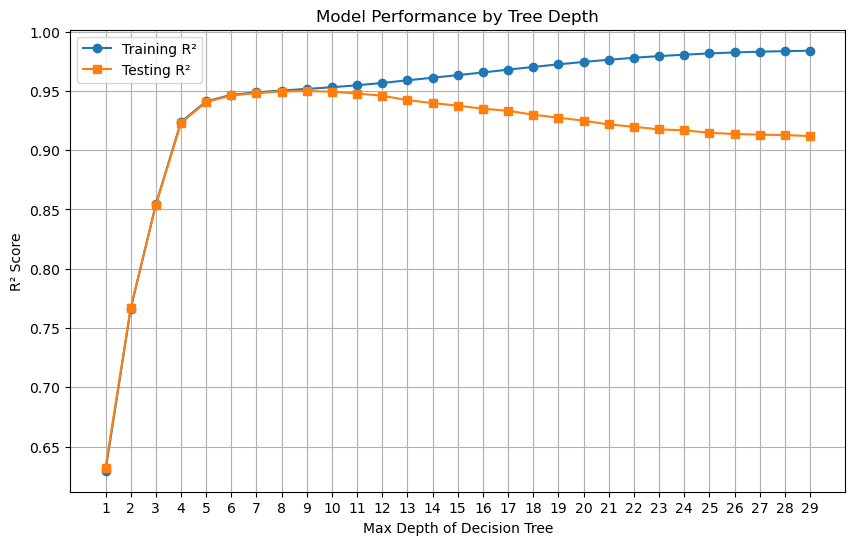

In [39]:
# Extracting the values for plotting
k_values = performances['k']
train_r2_scores = performances['train_r2']
test_r2_scores = performances['test_r2']

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_r2_scores, label='Training R²', marker='o')
plt.plot(k_values, test_r2_scores, label='Testing R²', marker='s')
plt.title('Model Performance by Tree Depth')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

The model above compares the R^2 value of the test and training sets. The training score appears to get higher and higher, whereas the test score begins to decrease around a max depth of 8. While the peak training score may occur around here it may not be the best choice. Notice the score at 6 is very similar but would offer significantly less computation and make the model simpler.

Now that we have our optimal model, we will now model the decision tree and calculate its overall performance

In [40]:
# Run the optimal model
best_model1 = DecisionTreeRegressor(max_depth=6, random_state=42)
best_model1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

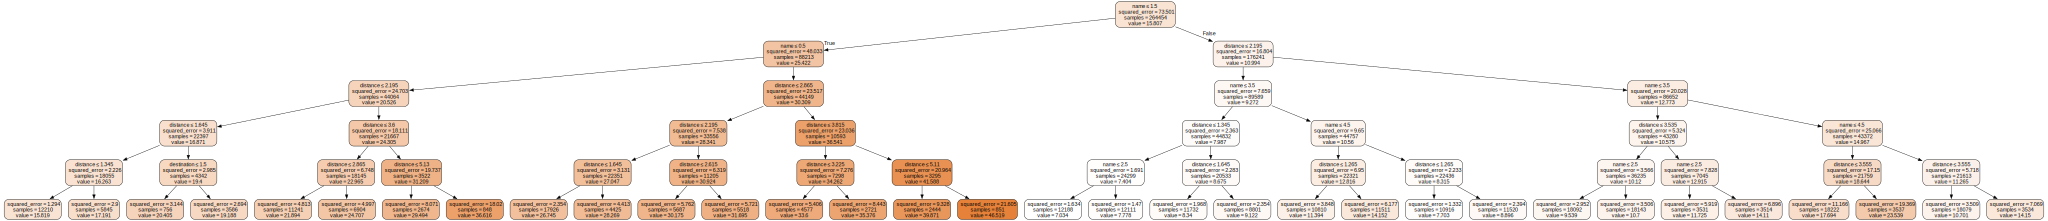

In [52]:
from sklearn.tree import export_graphviz
import graphviz

# Assuming model is already trained with your desired max_depth
dot_data = export_graphviz(model, out_file=None,
                           feature_names=feature_columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create the Source object
graph = graphviz.Source(dot_data)

# To set the output size, use the format parameter in the render function
graph.render('decision_tree_resized', format='png', view=True)
graph


In [42]:
# Prediction the y (price) values
y_pred1 = best_model1.predict(X_test)

#Evaluating the Model
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred1)
# These metric are being used for all models to compare which model is best.

# Print the performance metrics
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("R² (Coefficient of Determination):", r2)

MSE (Mean Squared Error): 3.9005627954228284
RMSE (Root Mean Squared Error): 1.974984251942994
R² (Coefficient of Determination): 0.9461142863984577


## Gradient Boosting

In [12]:
# Gradient Boosting Imports
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#### What is Gradient Boosting?
Gradient Boosting is a machine learning technique that builds models in a sequential manner. The gradient boosting algorithm combines predictions from multiple decision tress to general the best prediction. Each new model incrementally corrects errors made by previously trained models, using decision trees as the base. This approach makes gradient boosting particularly useful for analyzing complex datasets with nonlinear relationships and interaction effects. We chose gradient boosting as one of our models for its robustness and ability to handle various types of data efficiently, aiming to predict our target variable with high accuracy.
#### Random Forest VS Gradient Boosting
While Random Forest & Gradient Boosting are very similar they differ in key ways. Gradient Boosting builds trees sequentially, with each tree correcting the errors made by the ensemble of previous trees. This iterative process focuses on improving the model's weaknesses. Random Forest builds multiple decision trees independently and combines their predictions through averaging or voting. Each tree is trained on a random subset of the data and features, enhancing diversity and reducing overfitting. Both methods leverage decision trees through ensemble learning, Gradient Boosting focuses on iterative improvement, while Random Forest emphasizes diversity and averaging
#### Gradient Boosting Benchmark

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Model Initialization with GradientBoosting
model_gb = GradientBoostingRegressor(n_estimators=500, learning_rate=.01, max_features=5, max_depth=5, random_state=42)
# n_estimators=500: The number of trees in the forest. The algorithm will iteratively improve its predictions 500 times.
# learning_rate=.01: This is the rate at which the model learns. A smaller learning rate requires more trees to model all the relationships but can lead to a more accurate model.
# max_features=5: The maximum number of features to consider when looking for the best split which can help in making the model faster and reducing overfitting.
# max_depth=5: The maximum depth of each tree. Limited depth helps control overfitting, making the model less complex.
# random_state=42: A seed to  ensure reproducibility of the results.

# Model Training
model_gb.fit(X_train, y_train)
# The model learns to predict the target variable y_train from the features X_train
preds_test = model_gb.predict(X_test)
# The model uses the learned relationships to predict the target variable for new data, X_test.

#Evaluating the Model
mse = mean_squared_error(y_test, preds_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds_test)
# These metric are being used for all models to compare which model is best.

# Print the performance metrics
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("R² (Coefficient of Determination):", r2)

(264454, 12) (66114, 12) (264454,) (66114,)
MSE (Mean Squared Error): 3.7984472773156606
RMSE (Root Mean Squared Error): 1.9489605633043632
R² (Coefficient of Determination): 0.9475249975833804


#### Hyperparamter Tuning 
After completing an initial iteration with Gradient Boosting using specific parameters, I've established a benchmark model that sets a baseline for performance metrics such as MSE, RMSE, and R². This initial model serves as a starting point for further improvements. To enhance these performance metrics, I've used XGBoost and engaged in hyperparameter tuning with GridSearchCV. Extreme Gradient Boosting (XGBoost) is an efficient version of Gradient Boosting. It allows for similar results with fewer trees, making large data sets easier to process. This approach  explores various parameter configurations to identify the most effective model based on the negative mean squared error metric. Through this process of performance optimization, I aim to discover a set of hyperparameters that not only boosts the model's performance beyond the initial benchmark but also ensures its robustness and generalizability to new, unseen data.

In [14]:

# Initialize the XGBoost regressor with seed 42 to reproduce
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state = 42)

# Define the parameter grid to search
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10],
    'alpha': [5, 10],
    'n_estimators': [100, 200, 500, 800]
}

# A dictionary named param_grid is created, specifying the parameters to be tuned and the range of values for each. This includes:
    # - colsample_bytree: Fraction of features used per tree.
    # - learning_rate: Step size shrinkage used to prevent overfitting.
    # - max_depth: Maximum depth of the trees.
    # - alpha: L1 regularization term on weights.
    # - n_estimators: Number of trees in the ensemble.

# Setup GridSearchCV
grid_search_cv3 = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1, return_train_score=True)
# GridSearchCV is used to explore different combinations of hyperparameters specified in param_grid to find the best performing model.
    # - estimator: The  model you want to optimize.
    # - param_grid: The hyperparameters to be tested
    # - cv: Specifies the number of folds in a (Stratified) K-Fold cross-validation (3:2 test, 1 train - repeat 3 times)
    # - n_jobs: This parameter tells the grid search to run in parallel
    # - scoring: he metric used to evaluate the performance of the model for a given set of hyperparameters. Mean Squared Error (MSE), measures the average squared difference between the estimated values and the actual value. GridSearchCV aims to maximize the scoring metric; hence, MSE is negated since lower MSE values are better, and by negating it, the optimization problem becomes consistent.
    # - verbose=1: This controls the verbosity (How much information is printed)

# Fit the grid search to the data
grid_search_cv3.fit(X_train, y_train)

# Best parameters and best score with a cross-validation split of 3
print("Best parameters found: ", grid_search_cv3.best_params_)
print("Best score found: ", np.sqrt(-grid_search_cv3.best_score_))

# Best estimator (model) with a cross-validation split of 3
best_model3 = grid_search_cv3.best_estimator_


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters found:  {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score found:  1.859852786509415


Conducting cross-validation (CV) with different fold numbers, within the XGBoost framework allows for a nuanced understanding of model performance across varying levels of data segmentation. This strategy helps in identifying the optimal balance between model training time and prediction accuracy. By comparing results across these different CV settings, one can better understand the trade-offs involved and select a CV strategy that aligns best with the project objectives

CV is used ito assess how well a model will generalize to a data set. It involves splitting the data into training sets and a test set, then training the model on the training set and evaluating it on the test set. This process is repeated multiple times with each split taking a turn as the test set to produce a more accurate and less biased estimate of the model's performance. Cross-validation helps in identifying the model that performs best on unseen data, thereby reducing the likelihood of overfitting.

In [23]:
# Setup GridSearchCV with 5
grid_search_cv5 = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1, return_train_score=True)

# Fit the grid search to the data
grid_search_cv5.fit(X_train, y_train)

# Best parameters and best score with a cross-validation split of 5
print("Best parameters found: ", grid_search_cv5.best_params_)
print("Best score found: ", np.sqrt(-grid_search_cv5.best_score_))

# Best estimator (model) with a cross-validation split of 5
best_model5 = grid_search_cv5.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score found:  1.852872653020119


In assessing the performance of XGBoost models using 3-fold and 5-fold cross-validation, it was observed that the model validated with 5 folds produced a marginally lower Root Mean Squared Error (RMSE) compared to the 3-fold cross-validation. This improvement in RMSE, although slight, indicates that a higher number of folds can offer a more refined estimate of the model's ability to generalize to unseen data, enhancing its predictive accuracy. Notably, both cross-validation strategies converged on the same optimial hyperparameters, emphasizing the robustness of the model's configuration. However, it's important to highlight that the increase in folds to CV=5 resulted in a substantially longer processing time. This trade-off between improved accuracy and increased computational demand emphasizes the need for a balanced approach, especially when considering the constraints of the project.

#### Best Model 

In [24]:
# Use the best estimator to make predictions
predictions = best_model3.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the performance metrics
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("R² (Coefficient of Determination):", r2)

MSE (Mean Squared Error): 3.3717752399377443
RMSE (Root Mean Squared Error): 1.8362394288157915
R² (Coefficient of Determination): 0.9534194103678413


In the plot below we see a comparison of the actual price value compared to the predicted price value. The diagonal line represents where the test price equals the actual price. If the model was perfect all the values would lie on that line. Our model shows a high degree of accuracy as the values all all along the line with a small amount of variance

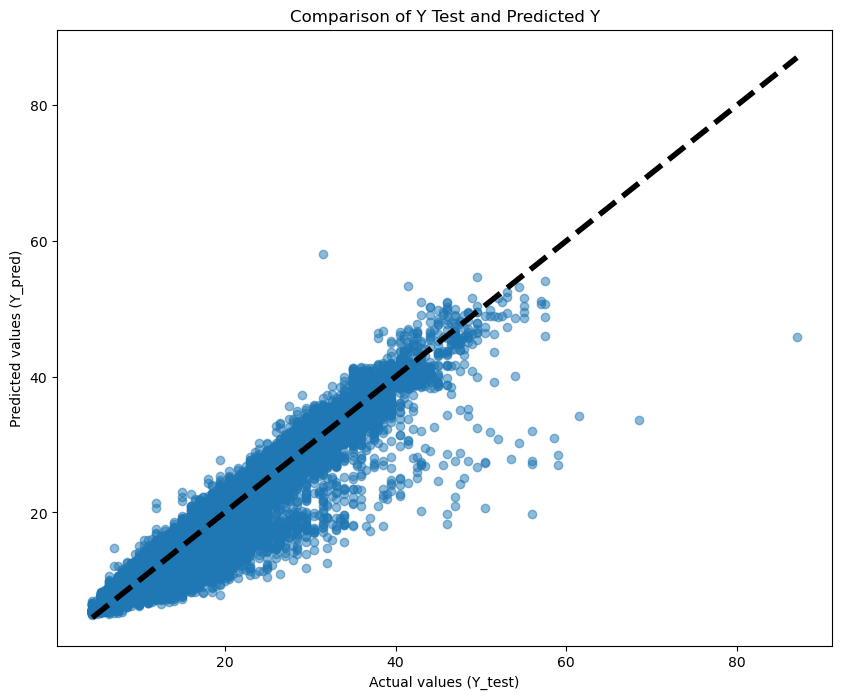

In [25]:
# Assuming you have a trained model named 'best_model3' and test set features 'X_test'
y_pred = best_model3.predict(X_test)

# Now create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Comparison of Y Test and Predicted Y')
plt.xlabel('Actual values (Y_test)')
plt.ylabel('Predicted values (Y_pred)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Plot a diagonal line
plt.show()

#### Drawbacks
Gradient Boosting gave a very high R^2 value of 95.34% however the algoritm has several drawbacks. The XGBoost algorithm involves many hyperparameters that need to be tuned which can be very time consuming. This leads to a computational intense model expesically when lots of data is involved and a high number of trees (n_estimators) is needed. Additionally, the algoritm is an an ensemble method that combines many decision trees which is not as interpretable as a highly interpretable method such as linear regression

## K-Nearest Neighbors Regression
We chose to use K-Nearest Neighbors (KNN) Regression because it is simple, easy to use, and doesn't require any assumptions about how the data is distributed. This is great for our complex dataset where traditional assumptions may not hold true. KNN also doesn't require a lot of tweaking, which allows us to focus on refining our feature set. 

We're particularly interested in understanding the impact of the features we engineered, and although KNN doesn't provide feature importance scores, we can evaluate the significance of our chosen features by analyzing how different feature configurations affect KNN's performance. This will help us understand which features are most important and how they relate to our target variable. This approach will allow us to refine our model and gain valuable insights into the underlying data relationships.

In [26]:
# Imports
from sklearn.neighbors import KNeighborsRegressor

#### Determining K Value
We chose specific k values (3, 4, 5, 7, 9, 11) for testing in the K-Nearest Neighbors (KNN) Regression model based on a strategic approach aimed at balancing model complexity and generalization ability. Starting with a small number of neighbors allows the model to capture more detailed patterns in the data, but this may lead to overfitting where the model is too closely tailored to the training set. As the number of neighbors increases, the model takes a broader context into account, reducing variance but potentially underfitting by smoothing predictions too much.

Our chosen k values provide a range of models from fine-grained to more generalized, allowing us to investigate the trade-off between capturing detailed data relationships and maintaining robustness to unseen data. This range avoids the extremes of too few (sensitive to noise) and too many neighbors (losing relevant information), aiming to find the optimal balance where the model performs best on unseen data, measured by metrics like R-squared, MSE, and RMSE.


In [27]:
neighbors_settings = [3, 4, 5, 7, 9, 11]

for n_neighbors in neighbors_settings:
    # Build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Test the model
    # R-squared
    r2 = r2_score(y_test, y_pred)
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse) 
    
    print(f"R^2 for {n_neighbors} neighbors: {r2}")
    print(f"MSE for {n_neighbors} neighbors: {mse}")
    print(f"RMSE for {n_neighbors} neighbors: {rmse}")

R^2 for 3 neighbors: 0.9167395562237907
MSE for 3 neighbors: 6.026877396954081
RMSE for 3 neighbors: 2.4549699380957968
R^2 for 4 neighbors: 0.917296154510147
MSE for 4 neighbors: 5.986587560879693
RMSE for 4 neighbors: 2.4467504083742773
R^2 for 5 neighbors: 0.9160188768906401
MSE for 5 neighbors: 6.079044377892731
RMSE for 5 neighbors: 2.4655718156023627
R^2 for 7 neighbors: 0.9128714870104566
MSE for 7 neighbors: 6.306870847077373
RMSE for 7 neighbors: 2.511348412123928
R^2 for 9 neighbors: 0.9091185582051136
MSE for 9 neighbors: 6.578529761724698
RMSE for 9 neighbors: 2.5648644723892717
R^2 for 11 neighbors: 0.9058390007629915
MSE for 11 neighbors: 6.815923291274751
RMSE for 11 neighbors: 2.6107323285382495


The evaluation of the KNN regression model across varying numbers of neighbors reveals the superiority of the model with 4 neighbors in terms of key performance metrics. This model stands out with an impressive R^2 value of 0.9173, indicating a strong ability to explain the variance in the target variable. Additionally, it showcases the lowest Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of 5.9866 and 2.4468, respectively, suggesting the smallest average prediction error.

Taken together, these results suggest that the KNN model with 4 neighbors achieves the best balance between capturing the underlying patterns in the data and generalizing well to unseen data. This model's performance is particularly noteworthy, providing a compelling argument for its use in modeling and prediction tasks.

#### Drawbacks with Model
Although the KNN regression model, especially with 4 neighbors, has shown impressive performance, it's not without limitations. Some of the possible limiations or drawbacks are: 
1. KNN can be computationally intensive, particularly as the dataset size grows. This is because it requires computing the distance between each query point and all other points in the dataset to identify the nearest neighbors. As a result, scalability can become an issue for large datasets.

2. KNN's performance heavily relies on the choice of distance metric and feature relevance. Irrelevant or highly correlated features can significantly degrade the model's accuracy.

3. KNN doesn't handle categorical variables well and requires pre-processing to convert them into a suitable numeric format.

4. KNN makes predictions based solely on the nearest neighbors, it can be sensitive to noise in the data, leading to overfitting, especially with an excessively low value of k.


# Neural Network
This following outlines the building and training of **two-layer** and **three-layer** Recurrent Neural Networks (RNNs) for predicting Uber rideshare prices based on historical data. The model is compiled with the Adam optimizer and mean squared error loss function. Training involves 100 epochs with a batch size of 32 and includes a validation split to monitor performance on unseen data.

In [3]:
# Import necessary libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam

In [10]:
# Normalize features
scaler_x = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_x.fit_transform(X)

# Normalize target variable
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(df[['price']])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

(264454, 12) (66114, 12) (264454, 1) (66114, 1)


#### What is a Neural Network?
The **Neural Network** is a cornerstone of deep learning - it consists of layers of interconnected nodes or "neurons," each capable of performing simple calculations. These neurons are organized in layers: an input layer that receives the data, hidden layers that process the data through weights and activation functions, and an output layer that produces the prediction or classification. This model is inspired by the structure and functions of the human brain's neural networks. Neural networks learn and improve their performance by adjusting the weights of connections between neurons based on the error of their predictions through the training process.
### Initial Definition and Training of the RNN Models
We construct a Sequential neural network comprised of one or two Long Short-Term Memory (LSTM) layers followed by a Dense layer. The LSTM layers are to capture long-term dependencies in sequential data, which makes them useful for time series forecasting or where the sequence of data points is crucial.
- The first LSTM layer contains 60 units and uses the ReLU activation function, with return_sequences=True to ensure that the output for each timestep is returned. This is so the next LSTM layer can receive sequences as inputs (architecture for stacking LSTM layers) The input_shape is defined as (1, X_train.shape[2]), which means that each input sequence consists of 1 timestep with a number of features equal to X_train.shape[2].
- The second LSTM layer, in the 3-layer model, also has 60 units and uses the ReLU activation function. This layer does not return sequences, so the model's output can transition from sequences to a single value prediction per input sequence.
- Finally, these is a Dense layer with a single unit, this is for producing the model's final output. 

In [11]:
# Simple RNN model architecture with 2 layers

# Initialize the Sequential model
model = Sequential()

# Add an Input layer to define the input shape
model.add(Input(shape=(1, X_train.shape[2])))

# Only one LSTM layer with 60 units, using ReLU activation function
# No return_sequences needed as it connects directly to a Dense layer next
model.add(LSTM(60, activation='relu'))

# Dense output layer with a single unit for regression output
model.add(Dense(1))

In [12]:
# RNN model architecture - 3 Layers

# Initialize the Sequential model
model2 = Sequential()

# Add an Input layer to define the input shape
model2.add(Input(shape=(1, X_train.shape[2])))

# First LSTM layer with 60 units, using ReLU activation function
model2.add(LSTM(60, activation='relu', return_sequences=True))

# Second LSTM layer, also returning sequences
# return_sequences=False by default, preparing for connection to Dense layer
model2.add(LSTM(60, activation='relu'))

# Dense output layer with a single unit for regression output
model2.add(Dense(1))

Next, we compile the models, and specify how they should be trained.

In [13]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model2.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 6s 784us/step - loss: 0.0024 - val_loss: 6.2286e-04
Epoch 2/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 719us/step - loss: 7.0915e-04 - val_loss: 9.8113e-04
Epoch 3/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 710us/step - loss: 6.7707e-04 - val_loss: 7.0914e-04
Epoch 4/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 704us/step - loss: 6.6869e-04 - val_loss: 6.1709e-04
Epoch 5/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 710us/step - loss: 6.5274e-04 - val_loss: 6.8291e-04
Epoch 6/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 738us/step - loss: 6.2604e-04 - val_loss: 6.3970e-04
Epoch 7/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 716us/step - loss: 6.2643e-04 - val_loss: 6.2295e-04
Epoch 8/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 738us/step - loss: 6.1672e-04 - val_loss: 6.5892e-04
Epoch 9/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 727us/step - loss: 6.2689e-04 - val_loss: 5.9046e-04
Epoch 10/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 699us/step - loss: 6.3024e-04 - val_loss: 6.6255e-04
Epoch 11/100


In [15]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0020 - val_loss: 6.2749e-04
Epoch 2/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 6.3568e-04 - val_loss: 5.8879e-04
Epoch 3/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 6.0944e-04 - val_loss: 6.6682e-04
Epoch 4/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 6.0891e-04 - val_loss: 6.1440e-04
Epoch 5/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 6.0485e-04 - val_loss: 5.8198e-04
Epoch 6/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.7805e-04 - val_loss: 6.1440e-04
Epoch 7/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.8206e-04 - val_loss: 5.5886e-04
Epoch 8/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.8405e-04 - val_loss: 5.6031e-04
Epoch 9/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.9248e-04 - val_loss: 5.7470e-04
Epoch 10/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.8175e-04 - val_loss: 5.9159e-04
Epoch 11/100
6612/6612 ━━━━━━━━━━

### Model Evaluation

In [16]:
# Evaluate the 2-layer model on the training and test set
train_loss_model = model.evaluate(X_train, y_train, verbose=0)
test_loss_model = model.evaluate(X_test, y_test, verbose=0)

# Convert losses from MSE to RMSE for the 2-layer model
train_loss_rmse_model = np.sqrt(train_loss_model)
test_loss_rmse_model = np.sqrt(test_loss_model)

# Predictions for training and test set using the 2-layer model
y_train_pred_model = model.predict(X_train)
y_test_pred_model = model.predict(X_test)

# R^2 score for training and test set using the 2-layer model
train_r2_model = r2_score(y_train, y_train_pred_model)
test_r2_model = r2_score(y_test, y_test_pred_model)

# Print the evaluation metrics for the 2-layer model
print("2-Layer Model Metrics:")
print(f'Training Loss (MSE): {train_loss_model:.4f}')
print(f'Training Loss (RMSE): {train_loss_rmse_model:.4f}')
print(f'Test Loss (MSE): {test_loss_model:.4f}')
print(f'Test Loss (RMSE): {test_loss_rmse_model:.4f}')
print(f'Training R^2 Score: {train_r2_model:.4f}')
print(f'Test R^2 Score: {test_r2_model:.4f}')

8265/8265 ━━━━━━━━━━━━━━━━━━━━ 3s 315us/step
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step
2-Layer Model Metrics:
Training Loss (MSE): 0.0006
Training Loss (RMSE): 0.0242
Test Loss (MSE): 0.0006
Test Loss (RMSE): 0.0241
Training R^2 Score: 0.9425
Test R^2 Score: 0.9418


In [17]:
# Evaluate the 3-layer model on the training and test set
train_loss_model2 = model2.evaluate(X_train, y_train, verbose=0)
test_loss_model2 = model2.evaluate(X_test, y_test, verbose=0)

# Convert losses from MSE to RMSE for the 3-layer model
train_loss_rmse_model2 = np.sqrt(train_loss_model2)
test_loss_rmse_model2 = np.sqrt(test_loss_model2)

# Predictions for training and test set using the 3-layer model
y_train_pred_model2 = model2.predict(X_train)
y_test_pred_model2 = model2.predict(X_test)

# R^2 score for training and test set using the 3-layer model
train_r2_model2 = r2_score(y_train, y_train_pred_model2)
test_r2_model2 = r2_score(y_test, y_test_pred_model2)

# Print the evaluation metrics for the 3-layer model
print("\n3-Layer Model Metrics:")
print(f'Training Loss (MSE): {train_loss_model2:.4f}')
print(f'Training Loss (RMSE): {train_loss_rmse_model2:.4f}')
print(f'Test Loss (MSE): {test_loss_model2:.4f}')
print(f'Test Loss (RMSE): {test_loss_rmse_model2:.4f}')
print(f'Training R^2 Score: {train_r2_model2:.4f}')
print(f'Test R^2 Score: {test_r2_model2:.4f}')

8265/8265 ━━━━━━━━━━━━━━━━━━━━ 4s 414us/step
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step

3-Layer Model Metrics:
Training Loss (MSE): 0.0006
Training Loss (RMSE): 0.0239
Test Loss (MSE): 0.0006
Test Loss (RMSE): 0.0238
Training R^2 Score: 0.9440
Test R^2 Score: 0.9432


**Adding an Additional Layer?**
Given the performance metrics of the 3-layer RNN model, there's little indication that the model is underfitting and the model captures the underlying patterns in the dataset effectively. Adding a fourth layer likely will not significantly improve performance and could potentially instead lead to overfitting and lead to less computational efficiency. 

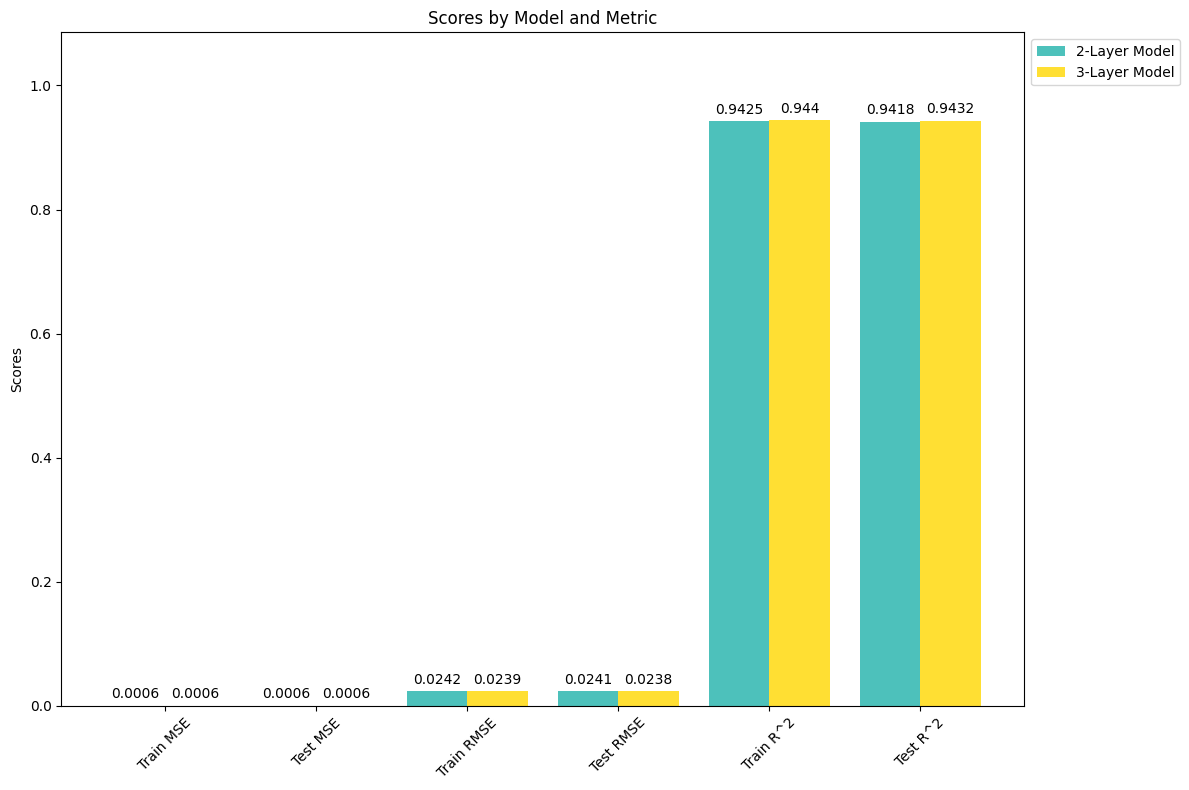

In [18]:
metrics_2_layer = [train_loss_model, test_loss_model, train_loss_rmse_model, test_loss_rmse_model, train_r2_model, test_r2_model]
metrics_3_layer = [train_loss_model2, test_loss_model2, train_loss_rmse_model2, test_loss_rmse_model2, train_r2_model2, test_r2_model2]
labels = ['Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE', 'Train R^2', 'Test R^2']

x = np.arange(len(labels))  
width = 0.4  

fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size for better visibility
rects1 = ax.bar(x - width/2, metrics_2_layer, width, label='2-Layer Model', alpha=0.8, color='lightseagreen')
rects2 = ax.bar(x + width/2, metrics_3_layer, width, label='3-Layer Model', alpha=0.8, color='gold')
ax.set_ylim(0, max(metrics_2_layer + metrics_3_layer) * 1.15)

# labels, title, x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)  # Rotate for better readability
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend out of the plot

# add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

The 3-layer model has a slight improvement over the 2-layer model across most metrics. So, adding an additional LSTM layer helped capture more complex dependencies in the sequence data, leading to more accurate predictions. But, the marginal gains need to be weighed against increased computational complexity and training time. The R^2 scores for both training and test sets are high and close to 1, which indicates that the models can account for a significant proportion of variance in the target variable. 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


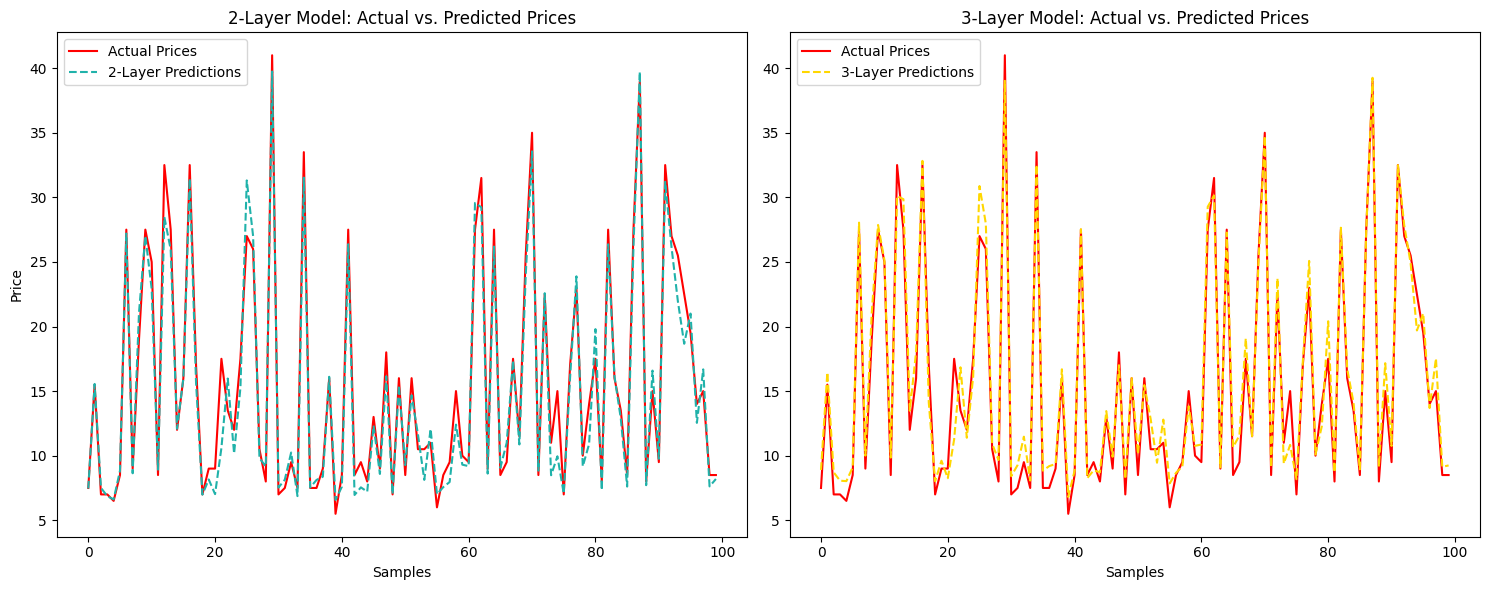

In [19]:
# Define a subset size for visualization
subset_size = 100  # Adjust as necessary

# Select a subset of actual and predicted prices
subset_indices = np.random.choice(a=len(y_test), size=subset_size, replace=False)  # Randomly select indices
actual_prices_subset = scaler_y.inverse_transform(y_test[subset_indices])
predicted_prices_model_subset = scaler_y.inverse_transform(model.predict(X_test[subset_indices]))
predicted_prices_model2_subset = scaler_y.inverse_transform(model2.predict(X_test[subset_indices]))

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(actual_prices_subset, label='Actual Prices', color='red')
plt.plot(predicted_prices_model_subset, label='2-Layer Predictions', color='lightseagreen', linestyle='--')
plt.title('2-Layer Model: Actual vs. Predicted Prices')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(actual_prices_subset, label='Actual Prices', color='red')
plt.plot(predicted_prices_model2_subset, label='3-Layer Predictions', color='gold', linestyle='--')
plt.title('3-Layer Model: Actual vs. Predicted Prices')
plt.xlabel('Samples')
plt.legend()

plt.tight_layout()
plt.show()

2067/2067 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step


<function matplotlib.pyplot.show(close=None, block=None)>

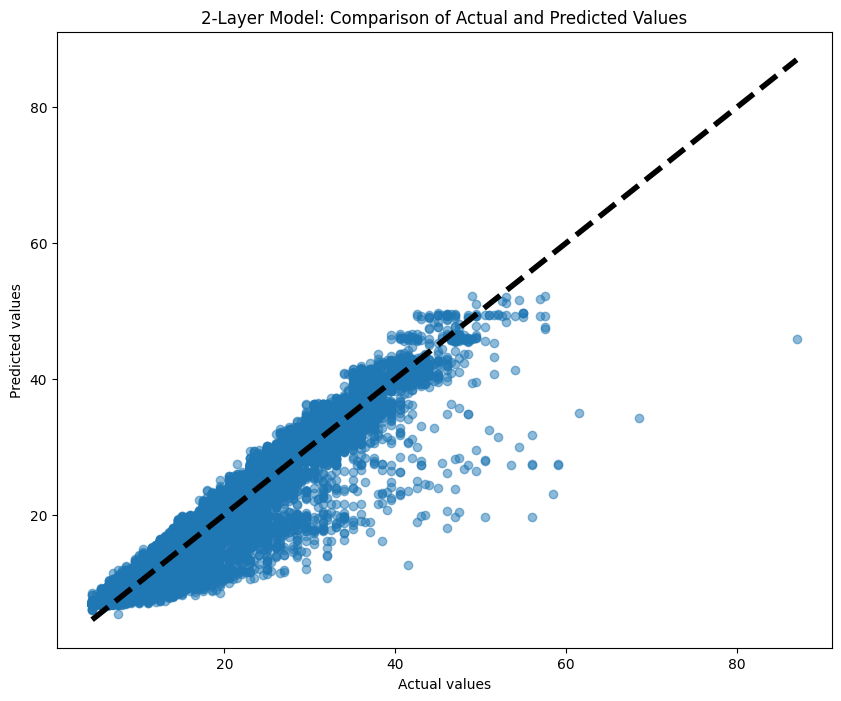

In [20]:
y_pred_scaled = model2.predict(X_test)

# Flatten y_pred_scaled if it's a 2D array with one column
y_pred_scaled = y_pred_scaled.flatten()

# Reverse the scaling for both actual and predicted values
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_actual = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.title('2-Layer Model: Comparison of Actual and Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'k--', lw=4)  # Plot a diagonal line
plt.show

From the scatterplot, it appears as if the model is relatively better at predicting lower prices compared to higher prices, due to more spread of the points around the diagonal for higher values, which indicates variance in the predictions. Overall, the points are densely clustered along the dashed line, which indicates a strong correlation between actual and predicted values and thus, good model performance.

### Drawbacks

Some drawbacks of the Recurrent Neural Network (RNN), particularly LSTM (Long Short-Term Memory) models inclide trade-offs in complexity, computational demands, interpretability, and the effort and computational power required for feature engineering and hyperparameter tuning. The performance of neural networks heavily depends on the input features, so ignificant effort may be required in feature engineering and normalization so that the model receives high-quality inputs. Also, neural networks are "black boxes", in that they have high complexity and it is difficult to understand how they make predictions. This is drawback when we need to understand the decision-making process. Finally, deep learning models like LSTMs, are highly complex and have a large number of parameters, which can sometimes lead to overfitting, where the model learns the training data too well, including noise, making it less effective on unseen data.